In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [177]:
freq_array = np.asarray([2.381, 2.128, 2.041, 1.923, 1.887, 1.786, 1.724, 1.695, 1.613, 1.563, 1.493])
current_array = np.asarray([15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5])
# current_array = np.asarray([0.015, 0.014, 0.013, 0.012, 0.011, 0.010, 0.009, 0.008, 0.007, 0.006, 0.005])
#standard deviation of the frequency
freq_std = np.std(freq_array)
# print(freq_std)
current_std = np.std(current_array)
print(current_std)

3.1622776601683795


In [156]:
def frequency_function(current, tau):
    resistance = 47000
    voltage_th = 1
    t_ref = 0.25
    f = 1/(t_ref - tau * np.log(1 - voltage_th/(current*resistance)))
    return f

In [171]:
param, cov = curve_fit(frequency_function, current_array, freq_array)
tau = param[0]
print("tau: {}".format(tau))
print(np.sqrt(cov[0][0]))

tau: 132106.20512654082
5430.742574400617


Text(0, 0.5, 'Frequency (Hz)')

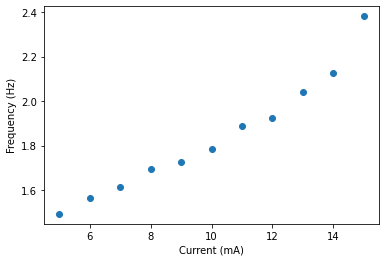

In [158]:
plt.plot(current_array, freq_array, 'o')
plt.xlabel("Current (mA)")
plt.ylabel("Frequency (Hz)")

In [159]:
new_frequencies = [frequency_function(c, tau) for c in current_array]

Text(0, 0.5, 'Frequency (Hz)')

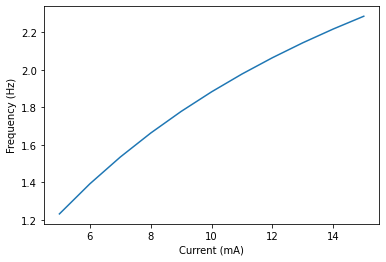

In [160]:
plt.plot(current_array, new_frequencies, '-')
plt.xlabel("Current (mA)")
plt.ylabel("Frequency (Hz)")

0.7557134910396559


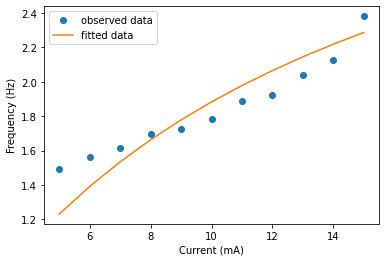

In [161]:
from sklearn.metrics import r2_score

plt.plot(current_array, freq_array, 'o', label='observed data')
plt.plot(current_array, new_frequencies, '-', label='fitted data')
plt.xlabel("Current (mA)")
plt.ylabel("Frequency (Hz)")
plt.legend()
# axes labels
#comment on freq being off, expected something else

r2 = r2_score(freq_array, new_frequencies)
print(r2)

In [162]:
def freq2(current, tau, voltage_th, t_ref):
    resistance = 47000
    f = 1/(t_ref - tau * np.log(1 - voltage_th/(current*resistance)))
    return f

param, cov = curve_fit(freq2, current_array, freq_array, p0=[tau, 1, 0.25])

v_th = param[1]
tref = param[2]
print(param)
v_var_unc = cov[1][1]
tref_var_unc = cov[2][2]
print(v_var_unc, tref_var_unc)

[9.99047406e+04 9.43080893e-01 3.29830996e-01]
446.06352925331674 0.0009746709535634095


Text(0, 0.5, 'Frequency (Hz)')

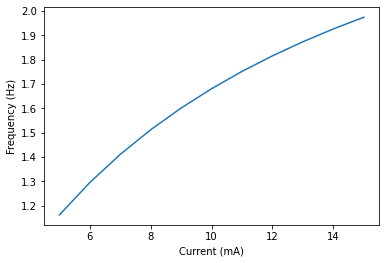

In [163]:
new_frequencies2 = [freq2(c, tau, v_th, tref) for c in current_array]
plt.plot(current_array, new_frequencies2, '-')
plt.xlabel("Current (mA)")
plt.ylabel("Frequency (Hz)")

In [164]:
print(param)
v_comp = abs(1 - param[1])
tref_comp = abs(0.25 - param[2])/0.25
print(v_comp, tref_comp)

[9.99047406e+04 9.43080893e-01 3.29830996e-01]
0.056919107082586406 0.31932398544985907


In [165]:
def perfect_if(current, v_th, tref):
    capacitance = 0.22
    f = current / (capacitance * v_th)
    return f

In [166]:
#fit the data from current array using perfect_if
param, cov = curve_fit(perfect_if, current_array, freq_array)
v_th = param[0]
tref = param[1]
#plot it
perfect_arr = [perfect_if(c, v_th, tref) for c in current_array]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0, 0.5, 'Frequency (Hz)')

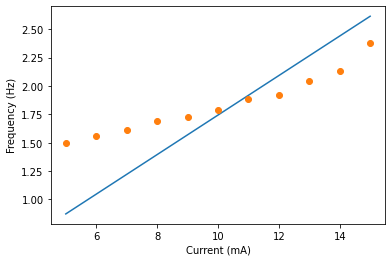

In [167]:
plt.plot(current_array, perfect_arr, '-')
plt.plot(current_array, freq_array, 'o')
plt.xlabel("Current (mA)")
plt.ylabel("Frequency (Hz)")

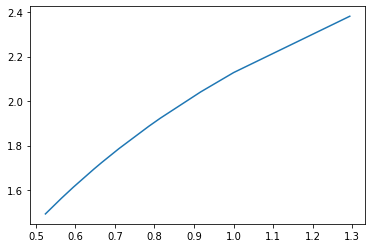

In [168]:
def inverse(frequency, capacitance, voltage, tref):
    current = (frequency*capacitance*voltage)/(1-frequency*tref)
    return current

inv_arr = [inverse(f, 0.22, 1, 0.25) for f in freq_array]
plt.plot(inv_arr, freq_array)

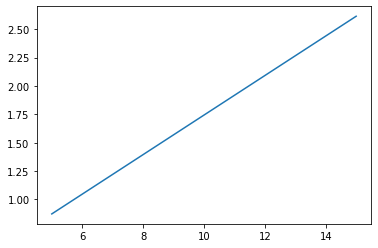

In [169]:
plt.plot(current_array, perfect_arr, '-')

In [172]:
# simulated values
ith = 1/47000
capacitance = 0.22
tref = 0.25
voltage = 1
resistance = 47000
#inferred values
ith_inf = 9.43080893e-01 / resistance
capacitance_inf = tau/resistance
tref_inf = 3.29830996e-01
voltage_inf = 9.43080893e-01
print(ith_inf)
print(capacitance_inf)
print(tref_inf)
print(voltage_inf)

2.0065550914893615e-05
2.8107703218412943
0.329830996
0.943080893
